In [26]:
# Imports
from __future__ import print_function, division
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

## The Plan
We're going to create some fake data and examine how it varies across a bunch of different directions.  To do this we'll use our friendly 2-D Gaussian do get a nice sample of fake data.  In the process, hopefully you'll discover something interesting about how data varies across its different dimensions.

### Creating Fake Data
Do the following:
- Generate a 2-D numpy array called `cov` (`np.array`) that looks like:
$$
\begin{bmatrix}2.9 & 2.2 \\ 2.2 & 6.5 \end{bmatrix}
$$
- Generate a bivariate Gaussian called `X` via `np.random.multivariate_normal()`
  - Make sure the parameter for the mean is [0, 0]
  - Make sure the parameter for the covariance matrix is your covariance matrix from above (`cov`)
  - Make sure the size parameter is set to 1000
- Plot a scatter plot of the 1st column of X against the 2nd column

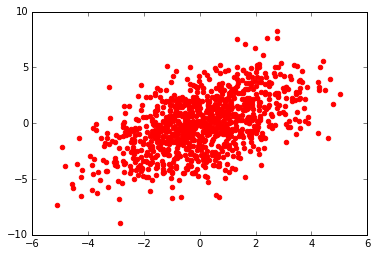

In [200]:
cov = np.array([[2.9, 2.2], [2.2, 6.5]])
X = np.random.multivariate_normal([0, 0], cov, size=1000)
plt.scatter(X[:, 0], X[:, 1], color='r')

### Computing Variance in many Directions
We need to compute variance of the fake data across all sorts of dimensions.

#### Creating the Dimensions
- Create a variable `x1` via `np.linspace`, ranging from 0 to 1 with 100 samples
- Create a variable `x2` equal to $\sqrt{1-x1^2}$ (so $x1^2 + x2^2 = 1$ always)
- Plot `x1` against `x2`

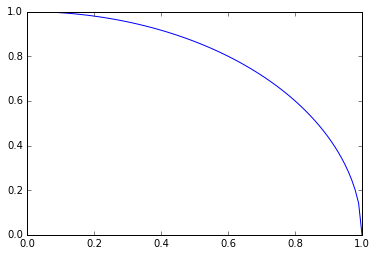

In [201]:
x1 = np.linspace(0, 1, 100)
x2 = np.sqrt((1-np.square(x)))
plt.plot(x1,x2)

#### Computing the Variance
- Create a matrix `W` that has 2 rows:
  - The first is `x1`
  - The second is `x2`
  - Do this by using `np.column_stack()` and then taking the `transpose()`
  - Check that this matrix has dimensionality 2 x 100
- Create a matrix `T` that is equal to $X^TW$ (you'll need to take an inner product (aka "dot" product :wink: )
  - Check that this matrix has dimensionality 1000 x 100
- Create a matrix `var_T` that computes the variance for each column of `T`
  - You'll want to use the `var` function
  - Make sure you set an appropriate value for the `axis` parameter and that your result has the right dimensions! (100 x 1)
- Plot x1 against var_T

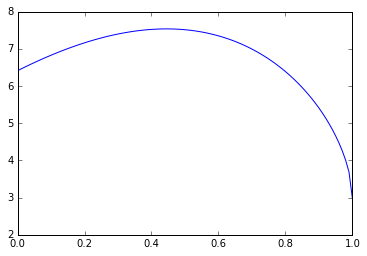

In [202]:
W = np.column_stack([x1, x2]).transpose()
T = np.dot(X, W)
var_T = T.var(axis=0)
plt.plot(x1, var_T)

### Finding the maximum Variance Direction
- Use `np.argmax` to find the `x1` and `x2` values that have maximum variance
  - Call these `x1_max` and `x2_max` respectively

In [174]:
x1_max = x1[np.argmax(var_T)]
x2_max = x2[np.argmax(var_T)]

### Thinking about what you've done
- Create a variable `x` defined on 0 to 5, 100 samples (`np.linspace`)
- Plot your scatterplot of the fake data `X` again just like above
- Plot `x` against $(x2\_max/x1\_max)

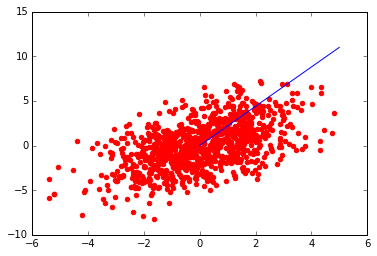

In [197]:
plt.scatter(X[:, 0], X[:, 1], color='r')
x = np.linspace(0, 5, 100)
plt.plot(x, (x2_max/x1_max)*x, color='b')

$$
$$